[Accueil](../../../index.ipynb) > [Sommaire](../../index.ipynb) > [6.4 Programmation dynamique](index.ipynb)

# TP Rendu de monnaie

L'optimisation du **rendu de monnaie** a déjà été traitée en première grâce [aux algorithmes gloutons](../../../Premiere/8_Algorithmique/5_algorithme_glouton.ipynb).

**Nous allons voir que la résolution par des algorithmes gloutons ne donne pas toujours la solution optimale et parfois ne trouve pas la solution...**

- Vous avez à votre disposition différentes pièces de monnaie;
- Vous devez rendre une certaine somme en minimisant le nombre de pièces rendues.

La solution par l'algorithme glouton est la suivante:

- Prendre la plus grande pièce possible;
- Recommencer l'opération jusqu'à ce que la somme à rendre soit nulle.

**Exemple 1**:

Vous avez à votre disposition les pièces suivantes:

- 2 centimes
- 5 centimes
- 10 centimes
- 50 centimes.

Vous devez rendre **11** centimes.

On applique l'algorithme glouton:

- On utilise une pièce de 10 centimes;
- Il reste 1 centime à rendre, mais nous ne disposons pas de cette pièce...

Pourtant la solution existe : 1 pièce de 5 et 3 pièces de 2.

**Exemple 2**:

Dans l’ancien système monétaire britannique qui avait cours avant 1971, **la livre sterling était divisée en 20 shillings** divisés chacun en 12 pence (pluriel de penny).

La valeur des différentes pièces existantes était 1, 3, 4, 6, 12, 24, 30, 60, 120, 240 et 252 pence. Depuis 1971 c’est un système décimal qui est utilisé avec les mêmes valeurs que dans le système de l’euro.

Si on applique l'algorithme glouton pour rendre 49 pence on trouve:

- 1 pièce de 30 pence (reste 19)
- 1 pièce de 12 pence (reste 7)
- 1 pièce de 6 pence (reste 1)
- 1 pièce de 1 penny (reste 0)

On a donc utilisé 4 pièces.

Pourtant la solution optimale est 2 pièces de 24 et 1 pièce de 1, soit 3 pièces.

<div class="alert alert-info">Dans certains cas un algorithme glouton trouvera une solution, mais celle ci ne sera pas forcément optimale.</div>

In [10]:
from math import inf

def rendu_monnaie_glouton(pieces, rendu):
    """
    Solution gloutonne
    Retourne: (nombre de pièces, liste des pièces utilisées)
    """
    pieces_triees = sorted(pieces, reverse=True)
    pieces_utilisees = []
    total = 0
    
    for piece in pieces_triees:
        while total + piece <= rendu:
            pieces_utilisees.append(piece)
            total += piece
    
    if total == rendu:
        return len(pieces_utilisees), pieces_utilisees
    else:
        return inf, []  # Aucune solution trouvée

In [11]:
# Exemple 1
pieces = [2, 5, 10, 50]
rendu_monnaie_glouton(pieces, 11)

(inf, [])

In [12]:
# Exemple 2
pieces = [1, 3, 4, 6, 12, 24, 30, 60, 120, 240, 252]
rendu_monnaie_glouton(pieces, 49)

(4, [30, 12, 6, 1])

## Modélisation du problème.

On a: 

- $x$ la **somme à rendre**;
- $N(x)$ **le nombre de pièces** à rendre.

Si je suis capable de rendre $x$ centimes avec $N(x)$ pièces, combien de pièces sont nécéssaires pour rendre x-p? (p étant la valeur d'une pièce)

Je dispose des pièces suivantes ${p_1, p_2, p_3,...., p_n}$. 

Si je suis capable de rendre $x$ centimes alors je suis capable de rendre:

- $x-p_1$ si $x \geq p_1$
- $x-p_2$ si $x \geq p_2$
- ...
- $x-p_i$ si $x \geq p_i$
- ...
- $x-p_n$ si $x \geq p_n$

Autrement dit $N(x) = 1 + N(x-p_i)\;\forall\;x\;\geq\;p_i$

**Exemples** : 

- Il me faudra une pièce de moins pour rendre 15 centimes que 20 centimes, si je dispose d'une pièce de 5 centimes.
- Il me faudra une pièce de moins pour rendre 10 centimes que 20 centimes, si je dispose d'une pièce de 10 centimes.

Ce qui nous intéresse c'est le **nombre minimum de pièces** parmi toutes les valeurs de $N(x-p_i)$.

La relation de récurrence pour notre problème d'optimisation est donc:

$
N(x)=
\left\{
    \begin{array}{ll}
        0\;si\; x=0 \\
        1+min(N(x-p_i))\; avec\;1\leq i <n\;et\;p_i\leq\;x
    \end{array}
\right.
$

### Première solution : la force brute

<div class="alert alert-info">

**A faire** : Implémenter cette solution en Python

</div>

pseudo code:
```
fonction rendu_monnaie_brute(pieces, rendu)
    nb_min <- infini
    #cas d'arrêt
    si le rendu est nul, on retourne 0
    #cas général
    pour chaque pièce
        si la pièce est inférieure au rendu
            nb_pieces <- 1 + rendu_monnaie(pieces, rendu - piece)
            si nb_pieces est inférieur à nb_min:
                nb_min <- nb_pieces
            fin de si
        fin de si
    fin pour
    on retourne nb_min

```

In [3]:
from math import inf

def rendu_monnaie_brute(pieces, rendu, pieces_utilisees=None):
    """
    Solution par force brute récursive
    pieces (list): les pieces disponibles, triées en ordre décroissant
    rendu (int) : le rendu
    pieces_utilisees : la liste des pièces utilisées triées de façon décroissante
    #memo : le dictionnaire de mémoïsation
    Retourne: (nombre de pièces, liste des pièces utilisées)
    """

    if pieces_utilisees is None:
        pieces_utilisees = []
    # Cas d'arrêt
    if rendu == 0:
        return 0, pieces_utilisees
    
    nb_min = inf # initialisation à l'infini
    meilleure_combinaison = []
    
    for piece in pieces:
        if piece <= rendu:
            # Appel récursif
            nb_pieces, combinaison = rendu_monnaie_brute(
                pieces, 
                rendu - piece, 
                pieces_utilisees + [piece]
            )
            
            nb_pieces += 1  # On compte la pièce courante
            
            if nb_pieces < nb_min:
                nb_min = nb_pieces
                meilleure_combinaison = combinaison
    
    return nb_min, meilleure_combinaison

In [2]:
# Exemple 1
pieces = [2, 5, 10, 50]
pieces = sorted(pieces, reverse=True)
rendu_monnaie_brute(pieces, 11)

(4, [5, 2, 2, 2])

### Observation de l'arbre d'appel récursif

- Construire l'arbre des appels récursif pour un rendu de 9.
- Existe t-il des redondances dans l'arbre ?
- Essayez pour le rendu de 90 centimes.
- Quels sont les avantages et inconvénients de cet algorithme par **force brute** ?

### Ajout de mémoïsation

S'inspirer de la fonction *rendu_monnaie_brute* pour créer la fonction *rendu_monnaie_brute_memo* qui utilise la mémoïsation

- Avant chaque calcul, vérifier si la clé est présente dans le dictionnaire memo
- Pour chaque calcul enregistrer dans le dictionnaire le résultat obtenu (nb_min, pieces_utilisees)


In [4]:
from math import inf

def rendu_monnaie_brute_memo(pieces, rendu, pieces_utilisees=None, memo=None):
    """
    Solution par force brute récursive avec mémoïsation
    pieces (list): les pieces disponibles, triées en ordre décroissant
    rendu (int) : le rendu
    pieces_utilisees : la liste des pièces utilisées triées de façon décroissante
    memo : le dictionnaire de mémoïsation
    Retourne: (nombre de pièces, liste des pièces utilisées)
    """
    # Si memo est None, l'initialiser à dictionnaire vide
    if memo is None:
        memo = {}

    if pieces_utilisees is None:
        pieces_utilisees = []

    # Cas d'arrêt
    if rendu == 0:
        return 0, pieces_utilisees
    
    # Vérification si le résultat du rendu est présent dans memo
    if rendu in memo:
        return memo[rendu]
    
    nb_min = inf # initialisation à l'infini
    meilleure_combinaison = []
    
    for piece in pieces:
        if piece <= rendu:
            # Appel récursif
            nb_pieces, combinaison = rendu_monnaie_brute_memo(
                pieces, 
                rendu - piece, 
                pieces_utilisees + [piece],
                memo = memo,
            )
            
            nb_pieces += 1  # On compte la pièce courante
            
            if nb_pieces < nb_min:
                nb_min = nb_pieces
                meilleure_combinaison = combinaison
    
    #stockage du resultat dans le memo
    memo[rendu]=(nb_min, meilleure_combinaison)
    #print(memo)
    
    return nb_min, meilleure_combinaison

In [12]:
# Exemple 2
pieces = [1, 3, 4, 6, 12, 24, 30, 60, 120, 240, 252]
pieces = sorted(pieces, reverse=True)
rendu_monnaie_brute_memo(pieces, 399)

(4, [252, 120, 24, 3])

### Comparaison des performances
Effectuons le calcul optimal des rendus de 5 à 30 par force brute, avec et sans mémoïsation.

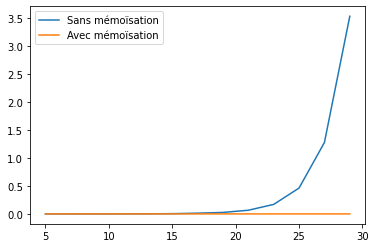

In [19]:
from timeit import timeit
import matplotlib.pyplot as plt

pieces = [1, 3, 4, 6, 12, 24, 30, 60, 120, 240, 252]
pieces = sorted(pieces, reverse=True)
temps_brute = []
temps_brute_memo = []
montants = range(5,30, 2)
for montant in montants:
    temps_brute.append(timeit('rendu_monnaie_brute(pieces, montant)', globals=globals(), number=2))
    temps_brute_memo.append(timeit('rendu_monnaie_brute_memo(pieces, montant)', globals=globals(), number=2))

plt.plot(montants, temps_brute, label="Sans mémoïsation")
plt.plot(montants, temps_brute_memo, label="Avec mémoïsation")
plt.legend()
plt.show()

La courbe sans memoïsation doit clairement montrer l'explosion combinatoire.

**A Faire**:
Dans le code ci-dessus,
- Désactiver l'appel et la représentation sans mémoïsation;
- Augmenter l'intervalle des rendus (par exemple de 100 à 1000);
- Augmenter le nombre de tests (number=10) afin de lisser la courbe;
- Observer le type de courbe obtenue.

Vu la courbe, quelle semble être la complexité temporelle de la fonction de force brute avec mémoïsation?

### Utilisation de la programmation dynamique : mémoïsation

Nous allons, cette fois-ci, utiliser la **mémoïsation** afin de ne pas recalculer des solutions déjà calculées.

Une fois la fonction écrite, calculer le nombre de pièces optimal pour rendre 1,71€.


In [ ]:
from math import inf as infinity

P = [2, 5, 10, 50, 100]

def rendu_monnaie_memo(P:list,rendu:int, memo = None)->int:
    """
    Détermine le nombre minimal de pièces
    à rendre.

    Algorithme récursif avec mémoïsation.
    """
    if memo == None:
        memo = {}
        
    if rendu<= 0 :
        return infinity
    if rendu in P :
        return 1
    else :
        mini = infinity
        for piece in P:
            if rendu - piece in memo.keys():
                nb = memo[rendu - piece]
            else:
                nb = rendu_monnaie_memo(P, rendu - piece, memo = memo)
                memo[rendu - piece] = nb
            if  nb < mini:
                mini = nb
        return mini + 1

rendu_monnaie_memo(P, 199)

**A faire**:

Essayer le rendu pour 49 pence.

In [ ]:
# Voici le systeme des pences
P=[1, 3, 4, 6, 12, 24, 30, 60, 120, 240, 252]


Solution (un peu dégueu) pour afficher la liste des pièces utilisées.

In [ ]:
P = [2, 5, 10, 50, 100]

def rendu_monnaie(P,x):
    """
    P : la liste des pièces disponibles
    x : le montant à rendre
    Retourne le nombre minimal de pièces à rendre
    """
    # On initialise le minimum à l'infini
    nb_min = float('inf')
    l_pieces = []

    # cas d'arrêt
    if x == 0:
        return 0, []
    
    # cas général
    for piece in P:
        if piece <= x:
            nb, pieces = rendu_monnaie(P, x-piece)
            nb_pieces = 1 + nb
            pieces.append(piece)
            if nb_pieces < nb_min:
                # affectation de la nouvelle valeur mini dans nb_min
                nb_min = nb_pieces
                l_pieces = pieces
    # On retourne le nombre mini trouvé
    return nb_min, l_pieces
        
        
    
rendu_monnaie(P, 13)